In [144]:
import pickle
import numpy as np

def compute_and_save_frame_differences(pkl_file_path, output_pkl_path, point_type="hand_right"):
    """
    Compute differences between consecutive frames (x2 - x1, y2 - y1) and save the results.

    Parameters:
        pkl_file_path (str): Path to the input filtered pkl file.
        output_pkl_path (str): Path to save the differences as a new pkl file.
        point_type (str): Keypoint type to process (e.g., 'hand_right', 'pose', etc.).

    Returns:
        None
    """
    # Load the filtered dataset
    with open(pkl_file_path, 'rb') as f:
        data = pickle.load(f)
    
    # Extract the keypoints for the specified type
    keypoints = data[point_type]  # e.g., 'hand_right' (shape: frames x points x 3)

    # Compute the frame-to-frame differences
    # Differences for X and Y coordinates only
    frame_differences = keypoints[1:, :, :2] - keypoints[:-1, :, :2]  # Shape: (frames-1, points, 2)

    # Prepare a dictionary to save the results
    differences_data = {
        "frame_differences": frame_differences,  # Delta between frames
        "point_type": point_type,  # Metadata about the type of keypoints
    }

    # Save the differences to a new pkl file
    with open(output_pkl_path, 'wb') as f:
        pickle.dump(differences_data, f)

    print(f"Frame-to-frame differences saved to: {output_pkl_path}")


# Example usage
pkl_file_path = "/nas/Chingiz/sing_language/newDATA_points/output_filtered_threshold.pkl"
output_pkl_path = "/nas/Chingiz/sing_language/newDATA_points/frame_differences_threshold.pkl"
point_type = "hand_right"  # Change to 'pose', 'hand_left', or 'face' as needed

compute_and_save_frame_differences(pkl_file_path, output_pkl_path, point_type)


Frame-to-frame differences saved to: /nas/Chingiz/sing_language/newDATA_points/frame_differences_threshold.pkl


In [145]:
import pickle
def read_pkl(path):
    with open(path, 'rb') as f:
        data1 = pickle.load(f)
    return data1

path = '/nas/Chingiz/sing_language/newDATA_points/frame_differences_threshold.pkl' 

data_vector = read_pkl(path)


In [213]:


data_vector

{'frame_differences': array([[[-125.672,   12.299],
         [   0.703,  -71.583],
         [ -73.457,  -49.425],
         ...,
         [  90.638,  -94.002],
         [  22.76 ,  -72.127],
         [   0.745,  -62.452]],
 
        [[  45.684,  -45.883],
         [ -69.207,    7.98 ],
         [ -20.881,  -73.331],
         ...,
         [  36.875, -112.504],
         [  41.279,  -96.03 ],
         [  91.902,   -6.748]],
 
        [[   0.889,  -24.794],
         [  36.111,  -44.541],
         [ 108.917,  -38.334],
         ...,
         [ -88.205,   79.359],
         [ -31.941,   40.003],
         [ -67.759,  -66.484]],
 
        ...,
 
        [[  -0.741,   -0.167],
         [   2.971,    0.27 ],
         [  -3.426,    0.563],
         ...,
         [   3.732,    0.272],
         [  -2.281,   -3.173],
         [  -6.391,   -3.971]],
 
        [[  -1.575,    2.386],
         [  -0.336,   -0.464],
         [  -0.982,    0.214],
         ...,
         [   0.264,   -5.087],
         [  -4

In [147]:
data_vector['frame_differences'][:3]

array([[[-125.672,   12.299],
        [   0.703,  -71.583],
        [ -73.457,  -49.425],
        [ -57.016,  -73.113],
        [ -55.32 ,  -90.503],
        [ -21.269,  -89.747],
        [  10.335, -105.148],
        [   0.383,  -87.72 ],
        [   8.5  ,  -80.745],
        [  24.301, -115.969],
        [  13.657, -103.452],
        [  49.862,  -72.874],
        [  15.422,  -50.789],
        [  28.263, -141.546],
        [  14.435,  -43.111],
        [  15.422,  -66.399],
        [  14.504,  -48.037],
        [  -8.497, -147.327],
        [  90.638,  -94.002],
        [  22.76 ,  -72.127],
        [   0.745,  -62.452]],

       [[  45.684,  -45.883],
        [ -69.207,    7.98 ],
        [ -20.881,  -73.331],
        [  99.413, -129.061],
        [  71.699,   -0.467],
        [ 120.174,  -88.087],
        [  48.617,  -89.829],
        [  57.767, -107.257],
        [  79.954,   -0.327],
        [ -22.426,  -10.98 ],
        [  33.444,  -59.433],
        [   3.174,  -70.463],
        

In [148]:
data_vector.keys()

dict_keys(['frame_differences', 'point_type'])

In [149]:
data_vector['point_type'] #/100

'hand_right'

In [178]:
import pickle
import numpy as np

def save_scaled_deltas(input_pkl_file, output_pkl_file, scaling_factor=60):
    """
    Save scaled delta values for all joints in the 'frame_differences' key of the input pkl file.

    Parameters:
        input_pkl_file (str): Path to the input pkl file containing frame differences.
        output_pkl_file (str): Path to save the scaled delta values.
        scaling_factor (float): Factor to scale the delta values (default: 100).

    Returns:
        None
    """
    # Load the delta dataset
    with open(input_pkl_file, 'rb') as f:
        data = pickle.load(f)

    # Validate the required keys
    if 'frame_differences' not in data or 'point_type' not in data:
        raise KeyError("The input file must contain 'frame_differences' and 'point_type' keys.")

    # Extract frame differences
    deltas = data['frame_differences']  # Shape: (frames-1, points, 2)

    # Scale the delta values
    scaled_deltas = deltas / scaling_factor  # Shape remains (frames-1, points, 2)

    # Save the scaled deltas along with metadata
    scaled_data = {
        "scaled_deltas": scaled_deltas,  # Scaled delta values
        "point_type": data['point_type'],  # Metadata about the keypoint type
    }
    with open(output_pkl_file, 'wb') as f:
        pickle.dump(scaled_data, f)

    print(f"Scaled deltas saved to: {output_pkl_file}")
    print(f"Shape of scaled deltas: {scaled_deltas.shape}")


# Example usage
input_pkl_file = "/nas/Chingiz/sing_language/newDATA_points/frame_differences_threshold.pkl"
output_pkl_file = "/nas/Chingiz/sing_language/newDATA_points/scaled_deltas_threshold.pkl"

save_scaled_deltas(input_pkl_file, output_pkl_file, scaling_factor=10)


Scaled deltas saved to: /nas/Chingiz/sing_language/newDATA_points/scaled_deltas_threshold.pkl
Shape of scaled deltas: (70, 21, 2)


In [179]:
import pickle
def read_pkl(path):
    with open(path, 'rb') as f:
        data1 = pickle.load(f)
    return data1

path_delta = '/nas/Chingiz/sing_language/newDATA_points/scaled_deltas_threshold.pkl' 

data_vector_delta = read_pkl(path_delta)
data_vector_delta

{'scaled_deltas': array([[[-12.5672,   1.2299],
         [  0.0703,  -7.1583],
         [ -7.3457,  -4.9425],
         ...,
         [  9.0638,  -9.4002],
         [  2.276 ,  -7.2127],
         [  0.0745,  -6.2452]],
 
        [[  4.5684,  -4.5883],
         [ -6.9207,   0.798 ],
         [ -2.0881,  -7.3331],
         ...,
         [  3.6875, -11.2504],
         [  4.1279,  -9.603 ],
         [  9.1902,  -0.6748]],
 
        [[  0.0889,  -2.4794],
         [  3.6111,  -4.4541],
         [ 10.8917,  -3.8334],
         ...,
         [ -8.8205,   7.9359],
         [ -3.1941,   4.0003],
         [ -6.7759,  -6.6484]],
 
        ...,
 
        [[ -0.0741,  -0.0167],
         [  0.2971,   0.027 ],
         [ -0.3426,   0.0563],
         ...,
         [  0.3732,   0.0272],
         [ -0.2281,  -0.3173],
         [ -0.6391,  -0.3971]],
 
        [[ -0.1575,   0.2386],
         [ -0.0336,  -0.0464],
         [ -0.0982,   0.0214],
         ...,
         [  0.0264,  -0.5087],
         [ -0.4058

In [180]:
len(data_vector_delta['scaled_deltas'])

70

In [181]:
import numpy as np

# Check min, max, mean, and standard deviation of deltas
deltas = data_vector_delta['scaled_deltas']
print("X deltas stats:")
print(f"Min: {deltas[..., 0].min()}, Max: {deltas[..., 0].max()}, Mean: {deltas[..., 0].mean()}, Std: {deltas[..., 0].std()}")

print("Y deltas stats:")
print(f"Min: {deltas[..., 1].min()}, Max: {deltas[..., 1].max()}, Mean: {deltas[..., 1].mean()}, Std: {deltas[..., 1].std()}")


X deltas stats:
Min: -12.567199999999996, Max: 12.017399999999999, Mean: 0.020879591836734702, Std: 2.0761780145925313
Y deltas stats:
Min: -16.742099999999994, Max: 15.631399999999996, Mean: -0.20972258503401364, Std: 2.7974777919917786


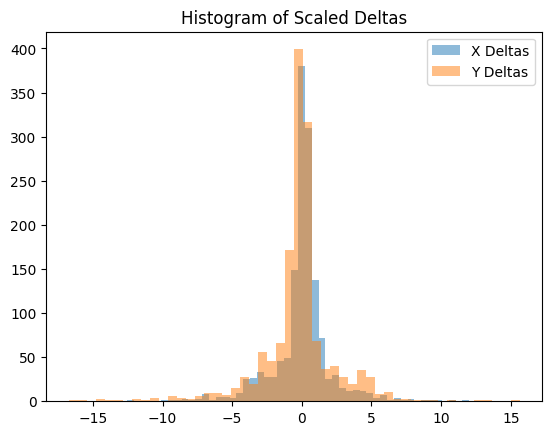

In [182]:
import matplotlib.pyplot as plt

# Flatten the deltas for easier plotting
x_deltas = deltas[..., 0].flatten()
y_deltas = deltas[..., 1].flatten()

plt.hist(x_deltas, bins=50, alpha=0.5, label="X Deltas")
plt.hist(y_deltas, bins=50, alpha=0.5, label="Y Deltas")
plt.legend()
plt.title("Histogram of Scaled Deltas")
plt.show()



In [183]:
import numpy as np
import pickle

def split_large_deltas_for_single_joint(input_pkl_file, output_pkl_file, joint_index=8, max_step=1.99, split_step=1.0):
    """
    Split large delta values into smaller steps for a specific joint across all frames and save the result.
    While splitting, reduce by `split_step` (default is 1.0) for each step.

    Parameters:
        input_pkl_file (str): Path to the input pkl file containing scaled deltas.
        output_pkl_file (str): Path to save the split delta values.
        joint_index (int): Index of the joint to process (e.g., 8 for Joint 9).
        max_step (float): Threshold to identify large deltas.
        split_step (float): Value to subtract while splitting large deltas (default: 1.0).

    Returns:
        None
    """
    # Load the scaled deltas
    with open(input_pkl_file, 'rb') as f:
        data = pickle.load(f)

    # Extract scaled deltas for the specified joint
    scaled_deltas = data['scaled_deltas'][:, joint_index, :]  # Shape: (frames, 2)

    # Initialize list to store split deltas for the specific joint
    split_deltas = []

    # Process each frame's delta for the specified joint
    for delta in scaled_deltas:
        x, y = delta  # Extract x and y deltas

        # Split X delta into smaller steps if it exceeds max_step
        x_steps = []
        while abs(x) > max_step:
            x_steps.append(np.sign(x) * split_step)  # Add a step of split_step in the correct direction
            x -= np.sign(x) * split_step  # Reduce the delta by split_step
        x_steps.append(x)  # Add the leftover step (this could be less than split_step or zero)

        # Split Y delta into smaller steps if it exceeds max_step
        y_steps = []
        while abs(y) > max_step:
            y_steps.append(np.sign(y) * split_step)  # Add a step of split_step in the correct direction
            y -= np.sign(y) * split_step  # Reduce the delta by split_step
        y_steps.append(y)  # Add the leftover step (this could be less than split_step or zero)

        # Combine X and Y steps into split deltas
        max_splits = max(len(x_steps), len(y_steps))
        x_steps.extend([0] * (max_splits - len(x_steps)))  # Pad with zeros
        y_steps.extend([0] * (max_splits - len(y_steps)))  # Pad with zeros
        split_deltas.extend(zip(x_steps, y_steps))  # Combine x and y steps into tuples

    # Convert split deltas to a 2D numpy array (time, 2)
    split_deltas = np.array(split_deltas)

    # Save the split deltas for the specific joint in the same format
    split_data = {
        "scaled_deltas": split_deltas,  # Split deltas for the specified joint
        "point_type": f"joint_{joint_index + 1}",  # Metadata for the joint type
    }
    with open(output_pkl_file, 'wb') as f:
        pickle.dump(split_data, f)

    print(f"Split deltas for Joint {joint_index + 1} saved to {output_pkl_file}")
    print(f"Shape of split deltas: {split_deltas.shape}")

# Example usage
input_pkl_file = "/nas/Chingiz/sing_language/newDATA_points/scaled_deltas_threshold.pkl"
output_pkl_file = "/nas/Chingiz/sing_language/newDATA_points/split_deltas_joint_8.pkl"

split_large_deltas_for_single_joint(input_pkl_file, output_pkl_file, joint_index=8, max_step=1.0, split_step=1.0)


Split deltas for Joint 9 saved to /nas/Chingiz/sing_language/newDATA_points/split_deltas_joint_8.pkl
Shape of split deltas: (240, 2)


In [184]:
import pickle
def read_pkl(path):
    with open(path, 'rb') as f:
        data1 = pickle.load(f)
    return data1

path_delta_split ="/nas/Chingiz/sing_language/newDATA_points/split_deltas_joint_8.pkl"

data_split = read_pkl(path_delta_split)
data_split

{'scaled_deltas': array([[ 0.85  , -1.    ],
        [ 0.    , -1.    ],
        [ 0.    , -1.    ],
        [ 0.    , -1.    ],
        [ 0.    , -1.    ],
        [ 0.    , -1.    ],
        [ 0.    , -1.    ],
        [ 0.    , -1.    ],
        [ 0.    , -0.0745],
        [ 1.    , -0.0327],
        [ 1.    ,  0.    ],
        [ 1.    ,  0.    ],
        [ 1.    ,  0.    ],
        [ 1.    ,  0.    ],
        [ 1.    ,  0.    ],
        [ 1.    ,  0.    ],
        [ 0.9954,  0.    ],
        [ 0.8855, -1.    ],
        [ 0.    , -1.    ],
        [ 0.    , -0.1421],
        [ 0.686 ,  0.2069],
        [ 0.0648,  0.6546],
        [-0.0373,  0.402 ],
        [-0.0666,  0.1206],
        [ 0.2716, -0.0107],
        [ 0.0221,  0.0297],
        [ 0.439 ,  0.0746],
        [ 1.    , -0.0929],
        [ 0.1458,  0.    ],
        [ 1.    , -0.1794],
        [ 0.2437,  0.    ],
        [ 1.    , -1.    ],
        [ 1.    , -1.    ],
        [ 1.    , -0.1385],
        [ 0.0138,  0.    ],
   

In [185]:
import pickle
def read_pkl(path):
    with open(path, 'rb') as f:
        data1 = pickle.load(f)
    return data1

path_delta = '/nas/Chingiz/sing_language/newDATA_points/scaled_deltas_threshold.pkl' 

data_vector_delta = read_pkl(path_delta)
data_vector_delta

{'scaled_deltas': array([[[-12.5672,   1.2299],
         [  0.0703,  -7.1583],
         [ -7.3457,  -4.9425],
         ...,
         [  9.0638,  -9.4002],
         [  2.276 ,  -7.2127],
         [  0.0745,  -6.2452]],
 
        [[  4.5684,  -4.5883],
         [ -6.9207,   0.798 ],
         [ -2.0881,  -7.3331],
         ...,
         [  3.6875, -11.2504],
         [  4.1279,  -9.603 ],
         [  9.1902,  -0.6748]],
 
        [[  0.0889,  -2.4794],
         [  3.6111,  -4.4541],
         [ 10.8917,  -3.8334],
         ...,
         [ -8.8205,   7.9359],
         [ -3.1941,   4.0003],
         [ -6.7759,  -6.6484]],
 
        ...,
 
        [[ -0.0741,  -0.0167],
         [  0.2971,   0.027 ],
         [ -0.3426,   0.0563],
         ...,
         [  0.3732,   0.0272],
         [ -0.2281,  -0.3173],
         [ -0.6391,  -0.3971]],
 
        [[ -0.1575,   0.2386],
         [ -0.0336,  -0.0464],
         [ -0.0982,   0.0214],
         ...,
         [  0.0264,  -0.5087],
         [ -0.4058

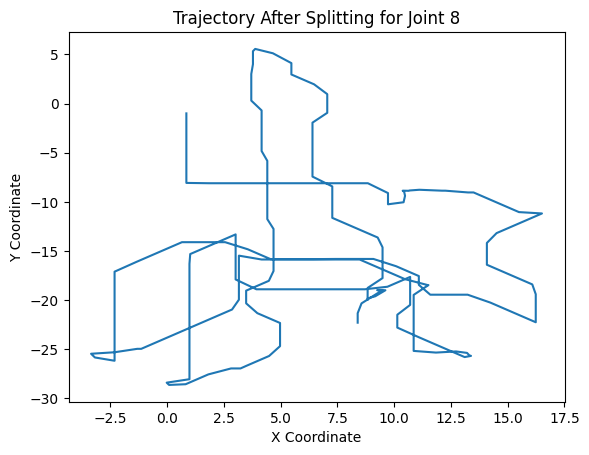

(240, 2)


In [186]:
import matplotlib.pyplot as plt
import numpy as np

# Load the split deltas for joint 8
with open("/nas/Chingiz/sing_language/newDATA_points/split_deltas_joint_8.pkl", 'rb') as f:
    data_split = pickle.load(f)

# Compute cumulative trajectory
split_deltas = data_split['scaled_deltas']  # Shape: (time, 2)
cumulative_trajectory = np.cumsum(split_deltas, axis=0)

# Plot the cumulative trajectory
plt.plot(cumulative_trajectory[:, 0], cumulative_trajectory[:, 1])
plt.title("Trajectory After Splitting for Joint 8")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()
print(data_split['scaled_deltas'].shape)


In [206]:
import pickle
import numpy as np

def convert_to_discrete(input_pkl_file, output_pkl_file, epsilon=0.1):
    """
    Convert split delta values to discrete values (-1, 0, 1).

    Parameters:
        input_pkl_file (str): Path to the input pkl file containing split deltas.
        output_pkl_file (str): Path to save the discrete delta values.
        epsilon (float): Threshold for determining stationary values.

    Returns:
        None
    """
    # Load the split deltas
    with open(input_pkl_file, 'rb') as f:
        data = pickle.load(f)

    # Extract split deltas
    split_deltas = data['scaled_deltas']  # Shape: (time, 2)

    # Convert to discrete values
    discrete_deltas = np.where(
        np.abs(split_deltas) < epsilon, 0,  # Assign 0 for values within the threshold
        np.where(split_deltas > 0, 1, -1)  # Assign 1 for positive, -1 for negative
    )

    # Save the discrete deltas in the same format
    discrete_data = {
        "discrete_deltas": discrete_deltas,
        "point_type": data['point_type'],  # Keep metadata for the joint type
    }
    with open(output_pkl_file, 'wb') as f:
        pickle.dump(discrete_data, f)

    print(f"Discrete deltas saved to {output_pkl_file}")
    print(f"Shape of discrete deltas: {discrete_deltas.shape}")

# Example usage
input_pkl_file = "/nas/Chingiz/sing_language/newDATA_points/split_deltas_joint_8.pkl"
output_pkl_file = "/nas/Chingiz/sing_language/newDATA_points/discrete_deltas_joint_8.pkl"

convert_to_discrete(input_pkl_file, output_pkl_file, epsilon=0.4)


Discrete deltas saved to /nas/Chingiz/sing_language/newDATA_points/discrete_deltas_joint_8.pkl
Shape of discrete deltas: (240, 2)


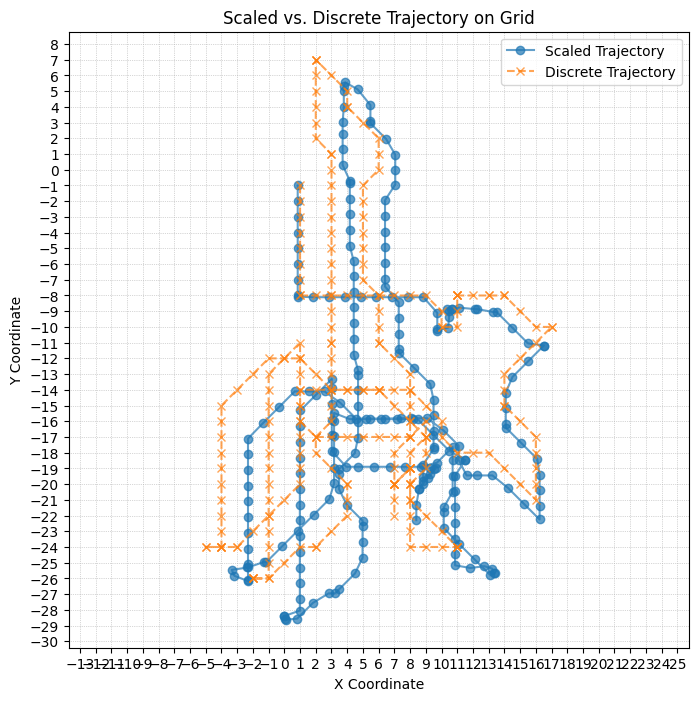

In [207]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load scaled and discrete deltas
with open("/nas/Chingiz/sing_language/newDATA_points/split_deltas_joint_8.pkl", 'rb') as f:
    data_split = pickle.load(f)

with open("/nas/Chingiz/sing_language/newDATA_points/discrete_deltas_joint_8.pkl", 'rb') as f:
    data_discrete = pickle.load(f)

# Extract scaled and discrete deltas
scaled_deltas = data_split['scaled_deltas']#[:30]   # Shape: (time, 2)
discrete_deltas = data_discrete['discrete_deltas']#[:30] # Shape: (time, 2)

# Compute cumulative trajectories
scaled_trajectory = np.cumsum(scaled_deltas, axis=0)
discrete_trajectory = np.cumsum(discrete_deltas, axis=0)

# Plot the trajectories
plt.figure(figsize=(8, 8))

# Plot the scaled trajectory
plt.plot(
    scaled_trajectory[:, 0],
    scaled_trajectory[:, 1],
    marker="o",
    linestyle="-",
    label="Scaled Trajectory",
    alpha=0.7
)

# Plot the discrete trajectory
plt.plot(
    discrete_trajectory[:, 0],
    discrete_trajectory[:, 1],
    marker="x",
    linestyle="--",
    label="Discrete Trajectory",
    alpha=0.7
)

# Add gridlines with 1x1 spacing
plt.grid(which="both", linestyle=":", linewidth=0.5)
plt.xticks(np.arange(-100, 100, 1))  # Adjust range as needed
plt.yticks(np.arange(-100, 100, 1))  # Adjust range as needed
plt.axis("equal")  # Ensure 1:1 scaling


# Add labels and legend
plt.title("Scaled vs. Discrete Trajectory on Grid")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.show()

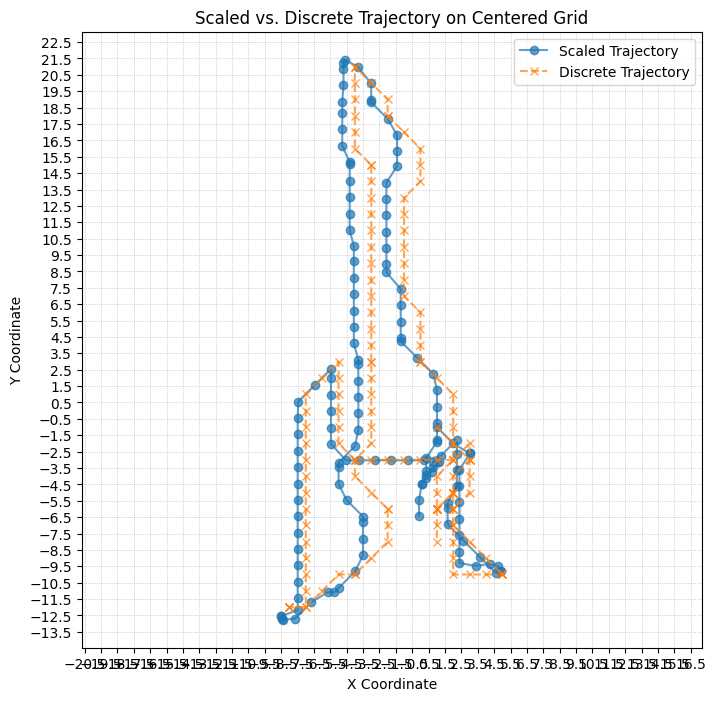

In [208]:

import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load scaled and discrete deltas
with open("/nas/Chingiz/sing_language/newDATA_points/split_deltas_joint_8.pkl", 'rb') as f:
    data_split = pickle.load(f)

with open("/nas/Chingiz/sing_language/newDATA_points/discrete_deltas_joint_8.pkl", 'rb') as f:
    data_discrete = pickle.load(f)

# Extract scaled and discrete deltas
scaled_deltas = data_split['scaled_deltas'][100:]  # Shape: (time, 2)
discrete_deltas = data_discrete['discrete_deltas'][100:]  # Shape: (time, 2)

# Compute cumulative trajectories
scaled_trajectory = np.cumsum(scaled_deltas, axis=0)
discrete_trajectory = np.cumsum(discrete_deltas, axis=0)

# Plot the trajectories
plt.figure(figsize=(8, 8))

# Plot the scaled trajectory
plt.plot(
    scaled_trajectory[:, 0],
    scaled_trajectory[:, 1],
    marker="o",
    linestyle="-",
    label="Scaled Trajectory",
    alpha=0.7
)

# Plot the discrete trajectory
plt.plot(
    discrete_trajectory[:, 0],
    discrete_trajectory[:, 1],
    marker="x",
    linestyle="--",
    label="Discrete Trajectory",
    alpha=0.7
)

# Add gridlines with 1x1 spacing, shifted by 0.5
plt.grid(which="both", linestyle=":", linewidth=0.5)
plt.xticks(np.arange(-100, 100, 1) + 0.5)  # Shift gridlines by 0.5 for X
plt.yticks(np.arange(-100, 100, 1) + 0.5)  # Shift gridlines by 0.5 for Y
plt.axis("equal")  # Ensure 1:1 scaling
# plt.axhline(0, color="black", linewidth=0.8)  # Add x-axis
# plt.axvline(0, color="black", linewidth=0.8)  # Add y-axis

# Add labels and legend
plt.title("Scaled vs. Discrete Trajectory on Centered Grid")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.show()


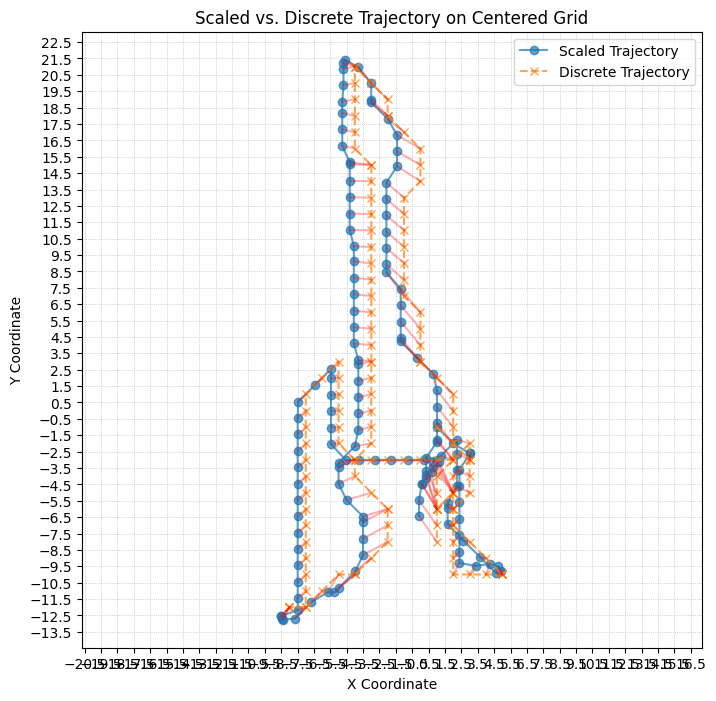

In [209]:
plt.figure(figsize=(8, 8))

# Plot the scaled trajectory
plt.plot(
    scaled_trajectory[:, 0],
    scaled_trajectory[:, 1],
    marker="o",
    linestyle="-",
    label="Scaled Trajectory",
    alpha=0.7
)

# Plot the discrete trajectory
plt.plot(
    discrete_trajectory[:, 0],
    discrete_trajectory[:, 1],
    marker="x",
    linestyle="--",
    label="Discrete Trajectory",
    alpha=0.7
)

# Adjust the gridlines to align with the centers
plt.grid(which="both", linestyle=":", linewidth=0.5)
plt.xticks(np.arange(-100, 100, 1) + 0.5)  # Shift gridlines by 0.5 for X
plt.yticks(np.arange(-100, 100, 1) + 0.5)  # Shift gridlines by 0.5 for Y
plt.axis("equal")  # Ensure 1:1 scaling


# Highlight significant deviations (optional)
for i in range(len(scaled_trajectory)):
    if i < len(discrete_trajectory):
        plt.plot([scaled_trajectory[i, 0], discrete_trajectory[i, 0]],
                 [scaled_trajectory[i, 1], discrete_trajectory[i, 1]],
                 color="red", alpha=0.3)  # Connect scaled and discrete points

# Add labels and legend
plt.title("Scaled vs. Discrete Trajectory on Centered Grid")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.show()


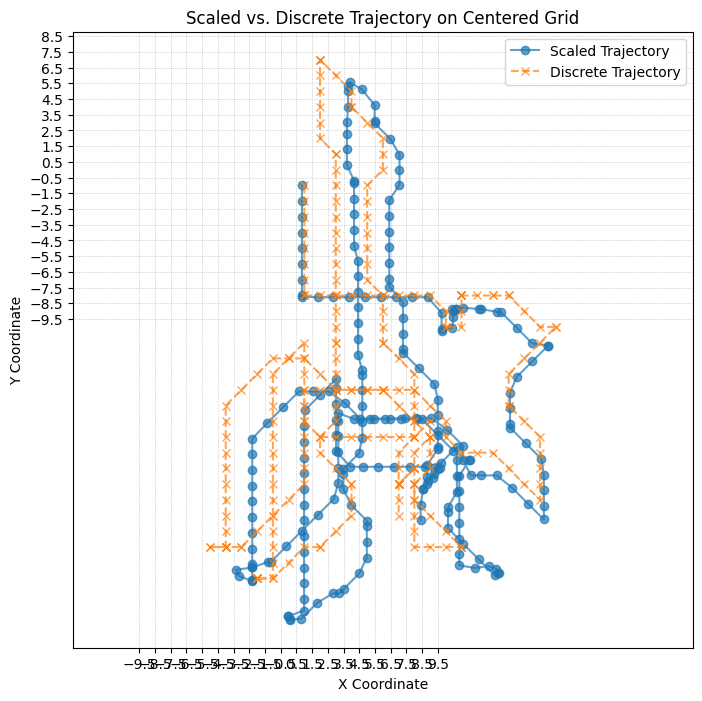

In [210]:

import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load scaled and discrete deltas
with open("/nas/Chingiz/sing_language/newDATA_points/split_deltas_joint_8.pkl", 'rb') as f:
    data_split = pickle.load(f)

with open("/nas/Chingiz/sing_language/newDATA_points/discrete_deltas_joint_8.pkl", 'rb') as f:
    data_discrete = pickle.load(f)

# Extract scaled and discrete deltas
scaled_deltas = data_split['scaled_deltas'] #[:30]  # Shape: (time, 2)
discrete_deltas = data_discrete['discrete_deltas']#[:30]  # Shape: (time, 2)

# Compute cumulative trajectories
scaled_trajectory = np.cumsum(scaled_deltas, axis=0)
discrete_trajectory = np.cumsum(discrete_deltas, axis=0)

# Plot the trajectories
plt.figure(figsize=(8, 8))

# Plot the scaled trajectory
plt.plot(
    scaled_trajectory[:, 0],
    scaled_trajectory[:, 1],
    marker="o",
    linestyle="-",
    label="Scaled Trajectory",
    alpha=0.7
)

# Plot the discrete trajectory
plt.plot(
    discrete_trajectory[:, 0],
    discrete_trajectory[:, 1],
    marker="x",
    linestyle="--",
    label="Discrete Trajectory",
    alpha=0.7
)

# Add gridlines with 1x1 spacing, shifted by 0.5
plt.grid(which="both", linestyle=":", linewidth=0.5)
plt.xticks(np.arange(-10, 10, 1) + 0.5)  # Shift gridlines by 0.5 for X
plt.yticks(np.arange(-10, 10, 1) + 0.5)  # Shift gridlines by 0.5 for Y
plt.axis("equal")  # Ensure 1:1 scaling


# Add labels and legend
plt.title("Scaled vs. Discrete Trajectory on Centered Grid")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.show()


Quantized Points:
(1.5260000000000105, -1.2759999999999536)
(11.52600000000001, -81.27599999999995)
(91.52600000000001, -81.27599999999995)
(101.52600000000001, -101.27599999999995)
(101.52600000000001, -91.27599999999995)
(111.52600000000001, -91.27599999999995)
(121.52600000000001, -91.27599999999995)
(131.526, -91.27599999999995)
(161.526, -111.27599999999995)
(141.526, -161.27599999999995)
(161.526, -221.27599999999995)
(111.52600000000001, -191.27599999999995)
(111.52600000000001, -171.27599999999995)
(71.52600000000001, -161.27599999999995)
(41.52600000000001, -161.27599999999995)
(11.52600000000001, -141.27599999999995)
(-18.47399999999999, -261.27599999999995)
(-28.47399999999999, -261.27599999999995)
(-18.47399999999999, -251.27599999999995)
(-8.47399999999999, -251.27599999999995)
(31.52600000000001, -151.27599999999995)
(81.52600000000001, -161.27599999999995)
(111.52600000000001, -181.27599999999995)
(111.52600000000001, -251.27599999999995)
(121.52600000000001, -251.275999

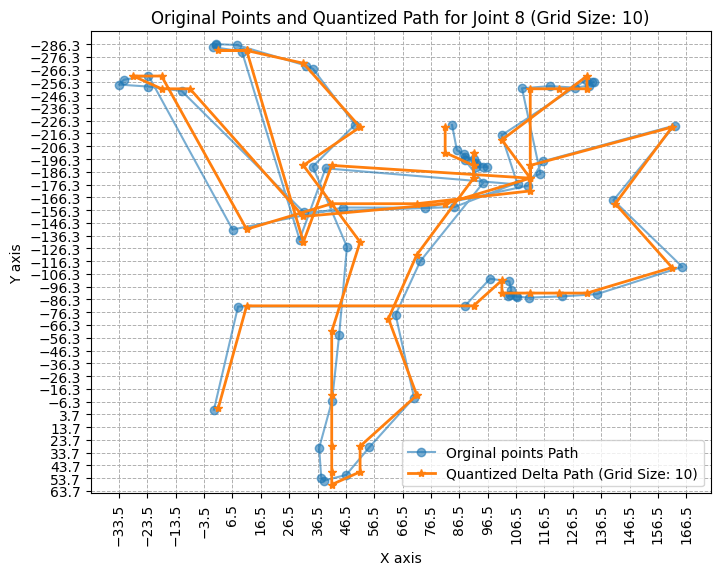

In [291]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Load the delta file
with open("/nas/Chingiz/sing_language/newDATA_points/frame_differences_threshold.pkl", "rb") as file:
    data = pickle.load(file)

# Extract frame differences for joint 8
frame_differences = data['frame_differences']  # Shape: (70, 21, 2)
joint_index = 8  # Focus on joint 8
delta_x = frame_differences[:, joint_index, 0]
delta_y = frame_differences[:, joint_index, 1]

# Initial point (starting at 0, 0)
initial_x = 0
initial_y = 0

# Create the delta-based path by accumulating delta values
delta_path_x = [initial_x]
delta_path_y = [initial_y]

for dx, dy in zip(delta_x, delta_y):
    next_x = delta_path_x[-1] + dx
    next_y = delta_path_y[-1] + dy
    delta_path_x.append(next_x)
    delta_path_y.append(next_y)

# Define grid size
grid_size = 10  # Adjust this based on your desired resolution

# Calculate grid boundaries based on the accumulated delta path
x_min, x_max = min(delta_path_x), max(delta_path_x)
y_min, y_max = min(delta_path_y), max(delta_path_y)

# Calculate grid lines
dis = grid_size / 1
x_grid_lines = np.arange(x_min - grid_size + dis, x_max + grid_size + dis, grid_size)
y_grid_lines = np.arange(y_min - grid_size + dis, y_max + grid_size + dis, grid_size)

# Initialize lists to store the quantized path
quantized_x = []
quantized_y = []

# Quantize the delta-based path
for x, y in zip(delta_path_x, delta_path_y):
    # Determine the grid cell for the current point
    x_cell = np.searchsorted(x_grid_lines, x) - 1
    y_cell = np.searchsorted(y_grid_lines, y) - 1

    # Check if this grid cell is valid
    if 0 <= x_cell < len(x_grid_lines) and 0 <= y_cell < len(y_grid_lines):
        # Calculate the center of the grid cell
        x_center = x_grid_lines[x_cell] + grid_size / 2
        y_center = y_grid_lines[y_cell] + grid_size / 2

        # Only add to the quantized path if the point is new or different from the last point
        if not quantized_x or (x_center != quantized_x[-1] or y_center != quantized_y[-1]):
            quantized_x.append(x_center)
            quantized_y.append(y_center)

# Print the quantized points
print("Quantized Points:")
for qx, qy in zip(quantized_x, quantized_y):
    print(f"({qx}, {qy})")

# Plotting
plt.figure(figsize=(8, 6))

# Draw the delta-based path
plt.plot(delta_path_x, delta_path_y, '-o', label='Orginal points Path', alpha=0.6)

# Draw the quantized path
plt.plot(quantized_x, quantized_y, '-*', linewidth=2, label=f'Quantized Delta Path (Grid Size: {grid_size})')

# Add grid lines and ticks
plt.xticks(x_grid_lines, rotation=90)
plt.yticks(y_grid_lines)
plt.grid(which='both', linestyle='--', linewidth=0.7)

# Adjust the limits of x and y axis to fit the grid nicely
plt.xlim(x_min - grid_size, x_max + grid_size)
plt.ylim(y_min - grid_size, y_max + grid_size)

plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title(f'Original Points and Quantized Path for Joint {joint_index} (Grid Size: {grid_size})')
plt.gca().invert_yaxis()
plt.legend()
plt.show()


RuntimeError: Can not put single artist in more than one figure

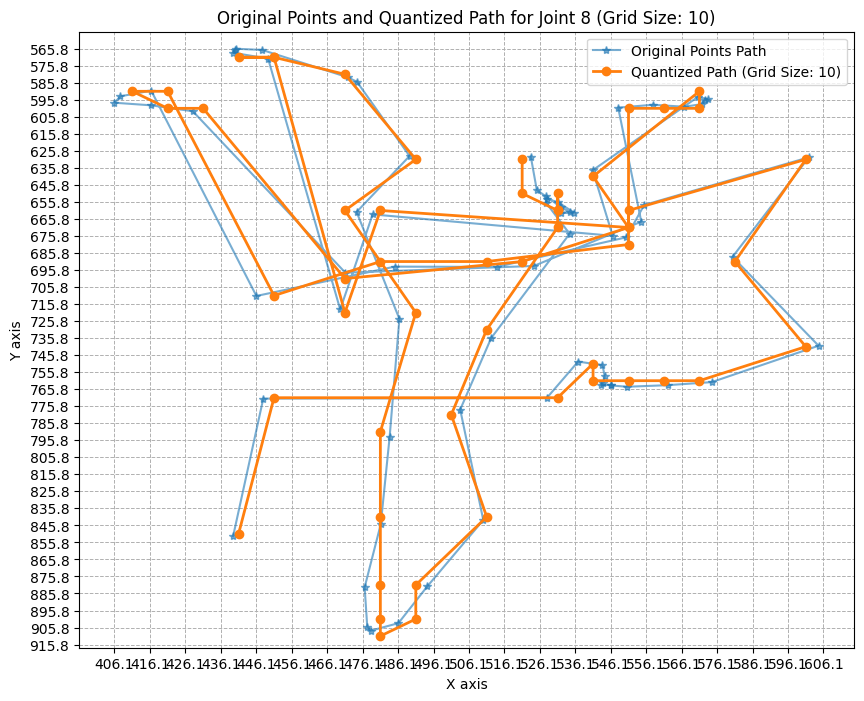

In [292]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Load the file containing original detected points
with open("/nas/Chingiz/sing_language/newDATA_points/output_filtered_threshold.pkl", "rb") as file:
    data = pickle.load(file)

# Extract data for the right hand
hand_right = data['hand_right']  # Shape: (frames, joints, 3)

# Select the joint to process (e.g., joint 8)
joint_index = 8
joint_points = hand_right[:, joint_index, :2]  # Extract (x, y) coordinates only

# Define grid size
grid_size = 10  # Adjust this based on your desired resolution

# Calculate grid boundaries based on the original points
x_min, x_max = min(joint_points[:, 0]), max(joint_points[:, 0])
y_min, y_max = min(joint_points[:, 1]), max(joint_points[:, 1])

# Calculate grid lines
dis = grid_size / 1
x_grid_lines = np.arange(x_min - grid_size + dis, x_max + grid_size + dis, grid_size)
y_grid_lines = np.arange(y_min - grid_size + dis, y_max + grid_size + dis, grid_size)

# Initialize lists to store the quantized path
quantized_x = []
quantized_y = []

# Quantize the original points
for x, y in joint_points:
    # Determine the grid cell for the current point
    x_cell = np.searchsorted(x_grid_lines, x) - 1
    y_cell = np.searchsorted(y_grid_lines, y) - 1

    # Check if this grid cell is valid
    if 0 <= x_cell < len(x_grid_lines) and 0 <= y_cell < len(y_grid_lines):
        # Calculate the center of the grid cell
        x_center = x_grid_lines[x_cell] + grid_size / 2
        y_center = y_grid_lines[y_cell] + grid_size / 2

        # Only add to the quantized path if the point is new or different from the last point
        if not quantized_x or (x_center != quantized_x[-1] or y_center != quantized_y[-1]):
            quantized_x.append(x_center)
            quantized_y.append(y_center)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the original points
ax.plot(joint_points[:, 0], joint_points[:, 1], '-*', label='Original Points Path', alpha=0.6)

# Draw the quantized path
ax.plot(quantized_x, quantized_y, 'o-', linewidth=2, label=f'Quantized Path (Grid Size: {grid_size})')

# Add grid lines and ticks
ax.set_xticks(x_grid_lines)
ax.set_yticks(y_grid_lines)
ax.grid(which='both', linestyle='--', linewidth=0.7)

# Adjust the limits of x and y axis to fit the grid nicely
ax.set_xlim(x_min - grid_size, x_max + grid_size)
ax.set_ylim(y_min - grid_size, y_max + grid_size)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title(f'Original Points and Quantized Path for Joint {joint_index} (Grid Size: {grid_size})')
ax.invert_yaxis()
ax.legend()

# # Add a zoomed-in inset
# zoom_x_min, zoom_x_max = 300, 600  # Adjust these values for the desired zoom region
# zoom_y_min, zoom_y_max = 400, 700  # Adjust these values for the desired zoom region
# ax_inset = inset_axes(ax, width="30%", height="30%", loc="upper right")  # Create an inset

# Plot the same data in the inset
ax_inset.plot(joint_points[:, 0], joint_points[:, 1], 'k--', alpha=0.6)
ax_inset.plot(quantized_x, quantized_y, 'g-', linewidth=2)

# Set the zoomed-in limits
ax_inset.set_xlim(zoom_x_min, zoom_x_max)
ax_inset.set_ylim(zoom_y_min, zoom_y_max)

# Add grid lines to the inset
ax_inset.grid(which='both', linestyle='--', linewidth=0.5)

# Invert the y-axis for the inset as well
ax_inset.invert_yaxis()

# Optional: Add a rectangle on the main plot to indicate the zoomed area
# rect = plt.Rectangle((zoom_x_min, zoom_y_min), zoom_x_max - zoom_x_min, zoom_y_max - zoom_y_min,
#                      linewidth=1, edgecolor='red', facecolor='none', linestyle='--')
ax.add_patch(rect)

plt.show()


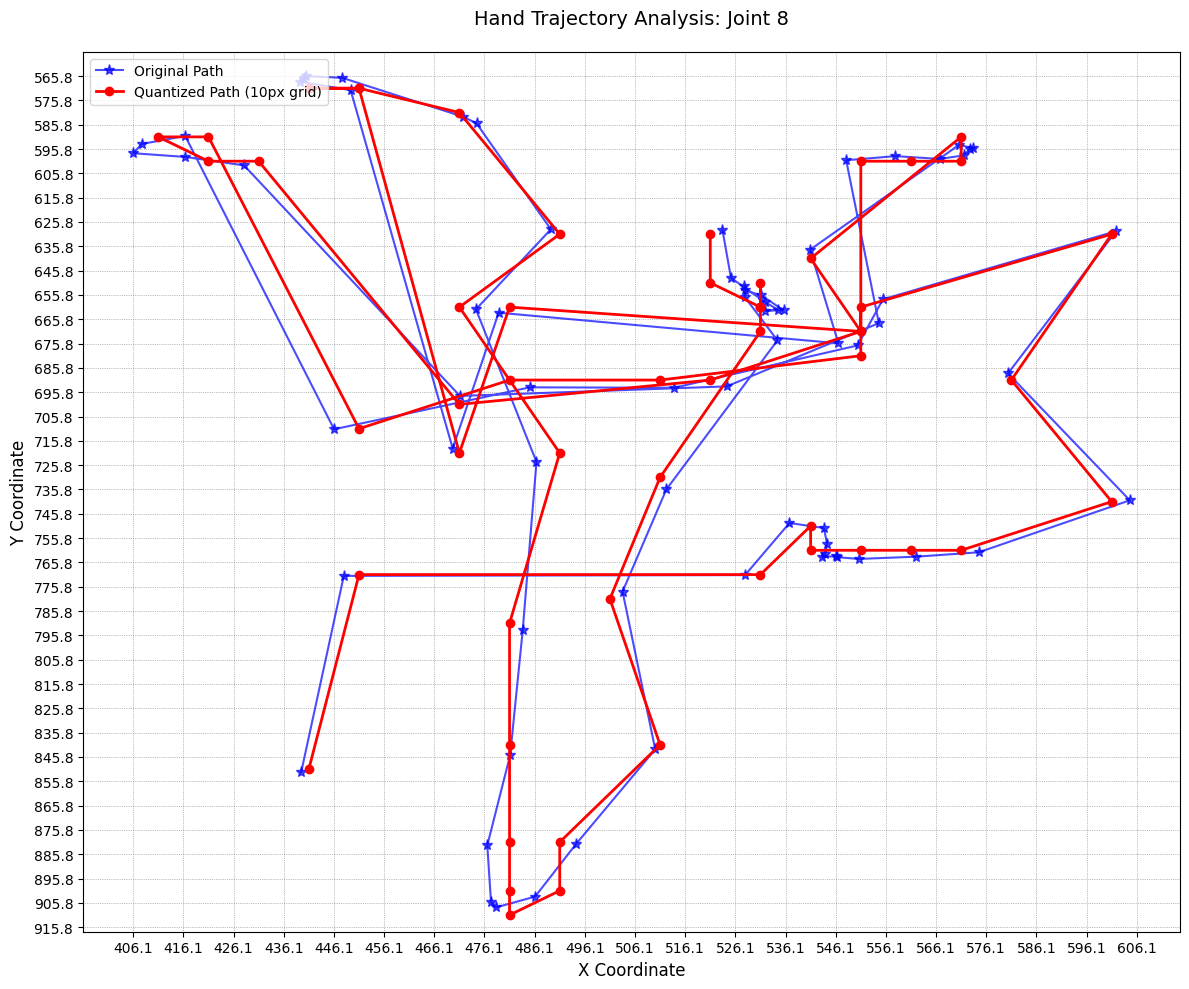

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Load data
with open("/nas/Chingiz/sing_language/newDATA_points/output_filtered_threshold.pkl", "rb") as file:
    data = pickle.load(file)

# Extract right hand data
hand_right = data['hand_right']
joint_index = 8
joint_points = hand_right[:, joint_index, :2]

# Grid parameters
grid_size = 10
x_min, x_max = joint_points[:, 0].min(), joint_points[:, 0].max()
y_min, y_max = joint_points[:, 1].min(), joint_points[:, 1].max()

# Generate grid lines
dis = grid_size / 1
x_grid_lines = np.arange(x_min - grid_size + dis, x_max + grid_size + dis, grid_size)
y_grid_lines = np.arange(y_min - grid_size + dis, y_max + grid_size + dis, grid_size)

# Quantize points
quantized_x, quantized_y = [], []
for x, y in joint_points:
    x_cell = np.searchsorted(x_grid_lines, x) - 1
    y_cell = np.searchsorted(y_grid_lines, y) - 1
    
    if 0 <= x_cell < len(x_grid_lines) and 0 <= y_cell < len(y_grid_lines):
        x_center = x_grid_lines[x_cell] + grid_size/2
        y_center = y_grid_lines[y_cell] + grid_size/2
        
        if not quantized_x or (x_center != quantized_x[-1] or y_center != quantized_y[-1]):
            quantized_x.append(x_center)
            quantized_y.append(y_center)

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))

# Main plot
ax.plot(joint_points[:, 0], joint_points[:, 1], 'b-*', label='Original Path', alpha=0.7, markersize=8)
ax.plot(quantized_x, quantized_y, 'r-o', linewidth=2, markersize=6, label=f'Quantized Path ({grid_size}px grid)')

# Grid styling
ax.set_xticks(x_grid_lines)
ax.set_yticks(y_grid_lines)
ax.grid(linestyle=':', linewidth=0.5, color='gray')
ax.set_xlim(x_min - grid_size, x_max + grid_size)
ax.set_ylim(y_min - grid_size, y_max + grid_size)
ax.invert_yaxis()
ax.set_xlabel('X Coordinate', fontsize=12)
ax.set_ylabel('Y Coordinate', fontsize=12)
ax.set_title(f'Hand Trajectory Analysis: Joint {joint_index}', fontsize=14, pad=20)
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

/tmp/ipykernel_1301828/291112919.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20')  # 20 distinct colors + alpha


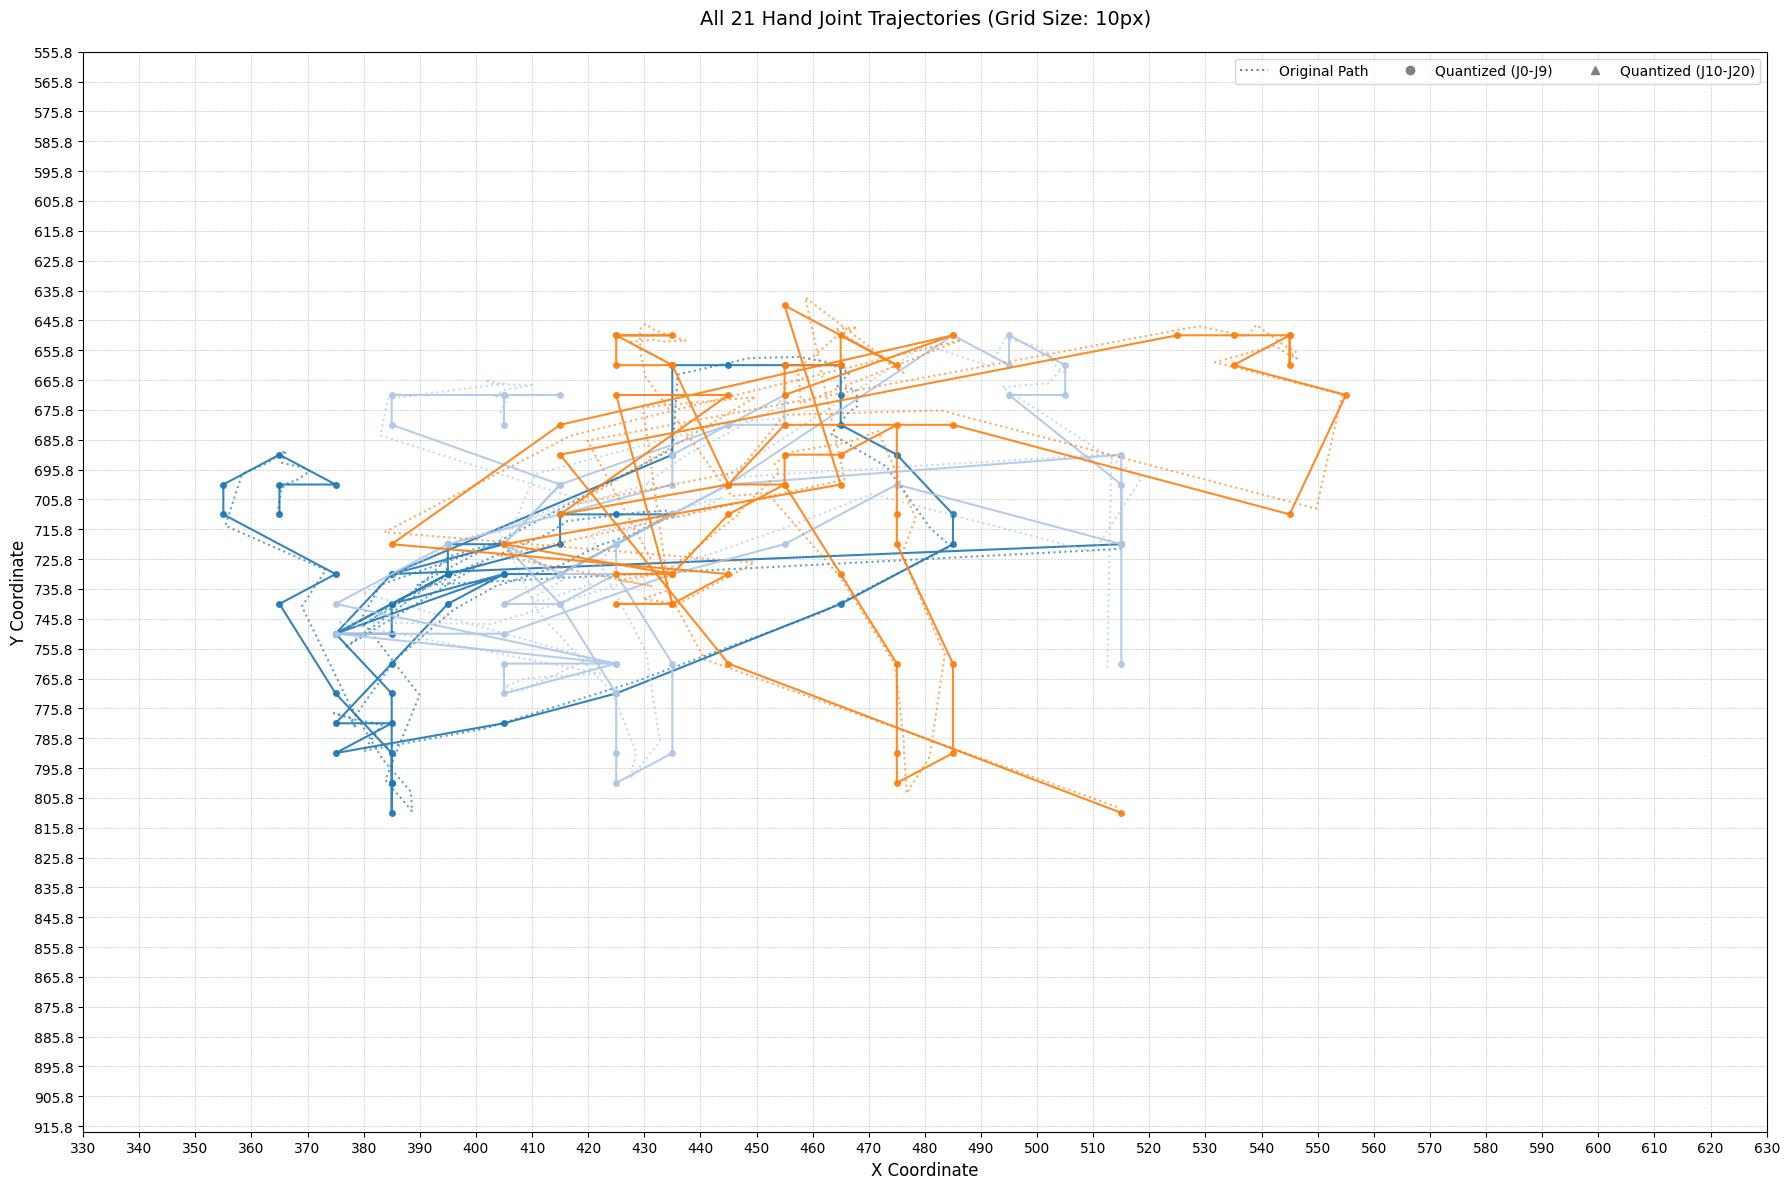

In [9]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap

# Load data
with open("/nas/Chingiz/sing_language/newDATA_points/output_filtered_threshold.pkl", "rb") as file:
    data = pickle.load(file)

# Extract right hand data (shape: [frames, 21 joints, 3 coordinates])
hand_right = data['hand_right']

# Set up grid parameters (using global min/max for all joints)
all_x = hand_right[:, :, 0].flatten()
all_y = hand_right[:, :, 1].flatten()
x_min, x_max = np.min(all_x), np.max(all_x)
y_min, y_max = np.min(all_y), np.max(all_y)
grid_size = 10  # Increased grid size for better visibility

# Create grid lines (shared by all joints)
x_grid = np.arange(x_min - grid_size, x_max + grid_size*2, grid_size)
y_grid = np.arange(y_min - grid_size, y_max + grid_size*2, grid_size)

# Set up colormap for 21 joints
cmap = get_cmap('tab20')  # 20 distinct colors + alpha
colors = [cmap(i % 20) for i in range(3)]  # Cycle through colors

# Create figure
fig, ax = plt.subplots(figsize=(18, 12))

# Process and plot all 21 joints
for joint_idx in range(3):
    # Get (x,y) coordinates for this joint
    joint_points = hand_right[:, joint_idx, :2]
    
    # Quantize trajectory (same logic as before)
    quant_x, quant_y = [], []
    for x, y in joint_points:
        x_bin = np.searchsorted(x_grid, x) - 1
        y_bin = np.searchsorted(y_grid, y) - 1
        
        if 0 <= x_bin < len(x_grid) and 0 <= y_bin < len(y_grid):
            x_center = x_grid[x_bin] + grid_size/2
            y_center = y_grid[y_bin] + grid_size/2
            
            if not quant_x or (x_center != quant_x[-1] or y_center != quant_y[-1]):
                quant_x.append(x_center)
                quant_y.append(y_center)
    
    # Plot both trajectories with joint-specific color
    alpha = 0.7 - (joint_idx * 0.02)  # Slightly vary transparency
    ax.plot(joint_points[:, 0], joint_points[:, 1], 
            color=colors[joint_idx], 
            linestyle=':', 
            alpha=alpha,
            label=f'J{joint_idx} Original')
    
    ax.plot(quant_x, quant_y, 
            color=colors[joint_idx], 
            marker='o' if joint_idx < 10 else '^',
            markersize=4,
            linewidth=1.5, 
            alpha=0.9,
            label=f'J{joint_idx} Quantized')

# Configure plot
ax.set_xticks(x_grid)
ax.set_yticks(y_grid)
ax.grid(linestyle=':', linewidth=0.4, color='gray')
ax.set_xlim(x_min - grid_size, x_max + grid_size)
ax.set_ylim(y_min - grid_size, y_max + grid_size)
ax.invert_yaxis()
ax.set_xlabel('X Coordinate', fontsize=12)
ax.set_ylabel('Y Coordinate', fontsize=12)
ax.set_title(f'All 21 Hand Joint Trajectories (Grid Size: {grid_size}px)', fontsize=14, pad=20)

# Create legend proxy handles
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='gray', linestyle=':', label='Original Path'),
    Line2D([0], [0], color='gray', marker='o', label='Quantized (J0-J9)', linestyle='None'),
    Line2D([0], [0], color='gray', marker='^', label='Quantized (J10-J20)', linestyle='None')
]
ax.legend(handles=legend_elements, loc='upper right', ncol=3)

plt.tight_layout()
plt.show()

/tmp/ipykernel_1376026/1197660991.py:95: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('nipy_spectral', num_joints)


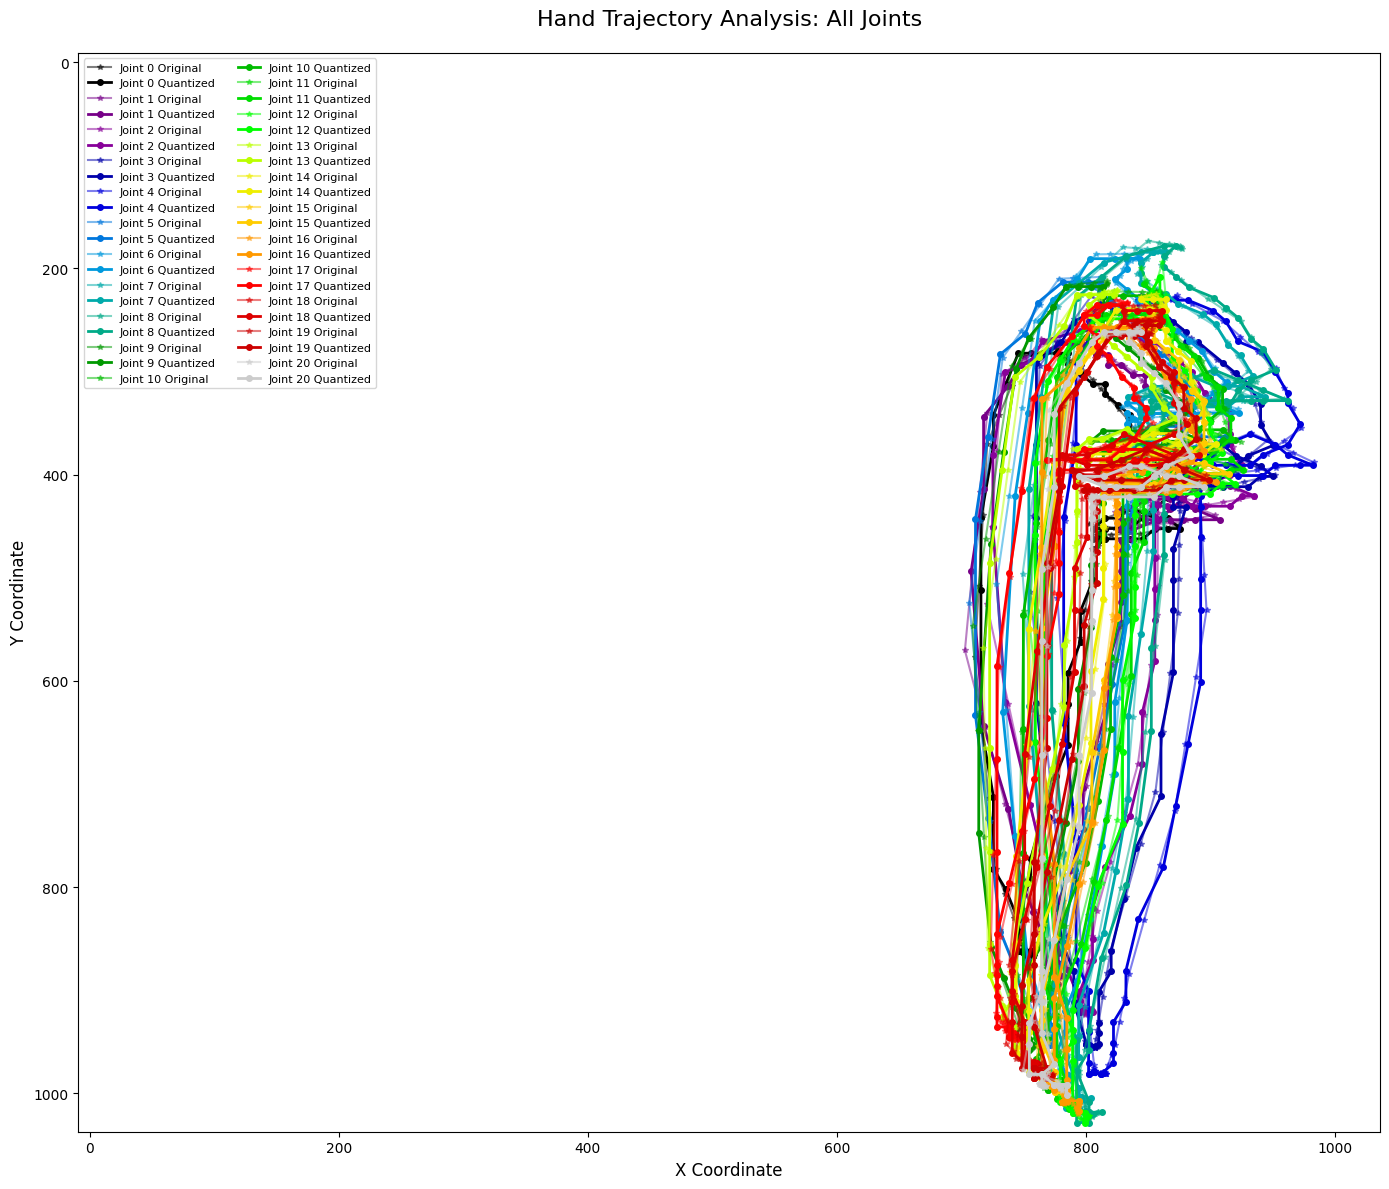

In [4]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

# === Load Data ===
with open("/nas/Chingiz/sing_language/all_json_to_pkl/01_real_word_keypoint/01/01/NIA_SL_WORD0001_REAL01_F.pkl", "rb") as file:
    data = pickle.load(file)

# We assume the key 'hand_right' contains data with shape (num_frames, 21, features)
hand_right = data['hand_right']

# === Set grid parameters ===
grid_size = 10  # size of each grid cell (in pixel units or your coordinate units)

# Create an output directory for single-joint images if it does not exist
single_joint_dir = "output_single_joints"
if not os.path.exists(single_joint_dir):
    os.makedirs(single_joint_dir)

# Function to quantize a series of points using grid parameters.
def quantize_points(joint_points, grid_size):
    # Compute bounds for current joint trajectory
    x_min, x_max = joint_points[:, 0].min(), joint_points[:, 0].max()
    y_min, y_max = joint_points[:, 1].min(), joint_points[:, 1].max()
    
    # Generate grid lines (you can adjust the padding as needed)
    dis = grid_size  # note: dis = grid_size/1 as in your code
    x_grid_lines = np.arange(x_min - grid_size + dis, x_max + grid_size + dis, grid_size)
    y_grid_lines = np.arange(y_min - grid_size + dis, y_max + grid_size + dis, grid_size)
    
    quantized_x, quantized_y = [], []
    for x, y in joint_points:
        x_cell = np.searchsorted(x_grid_lines, x) - 1
        y_cell = np.searchsorted(y_grid_lines, y) - 1
        
        if 0 <= x_cell < len(x_grid_lines) and 0 <= y_cell < len(y_grid_lines):
            x_center = x_grid_lines[x_cell] + grid_size/2
            y_center = y_grid_lines[y_cell] + grid_size/2
            
            # Append only if the new cell is different from the last one (to avoid duplicate points)
            if not quantized_x or (x_center != quantized_x[-1] or y_center != quantized_y[-1]):
                quantized_x.append(x_center)
                quantized_y.append(y_center)
                
    return (quantized_x, quantized_y, x_grid_lines, y_grid_lines, x_min, x_max, y_min, y_max)

# === Plot each joint separately ===
num_joints = 21

for joint_index in range(num_joints):
    joint_points = hand_right[:, joint_index, :2]  # shape: (num_frames, 2)
    (quantized_x, quantized_y, x_grid_lines, y_grid_lines,
     x_min, x_max, y_min, y_max) = quantize_points(joint_points, grid_size)
    
    # Create a figure for this joint
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Plot original trajectory
    ax.plot(joint_points[:, 0], joint_points[:, 1], 'b-*', label='Original Path',
            alpha=0.7, markersize=8)
    # Plot quantized trajectory
    ax.plot(quantized_x, quantized_y, 'r-o', linewidth=2,
            markersize=6, label=f'Quantized Path ({grid_size}px grid)')
    
    # Configure grid and limits
    ax.set_xticks(x_grid_lines)
    ax.set_yticks(y_grid_lines)
    ax.grid(linestyle=':', linewidth=0.5, color='gray')
    ax.set_xlim(x_min - grid_size, x_max + grid_size)
    ax.set_ylim(y_min - grid_size, y_max + grid_size)
    ax.invert_yaxis()  # invert y-axis if necessary for your coordinate system
    
    # Add labels and title
    ax.set_xlabel('X Coordinate', fontsize=12)
    ax.set_ylabel('Y Coordinate', fontsize=12)
    ax.set_title(f'Hand Trajectory Analysis: Joint {joint_index}', fontsize=14, pad=20)
    ax.legend(loc='upper left')
    
    plt.tight_layout()
    
    # Save the figure in the designated subfolder
    output_filepath = os.path.join(single_joint_dir, f"joint_{joint_index}.png")
    plt.savefig(output_filepath)
    plt.close(fig)

# === Plot all joints in one graph ===
# To plot all joints together, we first determine a global bounding box:
all_points = hand_right.reshape(-1, 2)
global_x_min, global_x_max = all_points[:, 0].min(), all_points[:, 0].max()
global_y_min, global_y_max = all_points[:, 1].min(), all_points[:, 1].max()

fig, ax = plt.subplots(figsize=(14, 12))
# Use a colormap with enough distinct colors (here we use 'tab20' which gives up to 20, so we can combine two colormaps or use 'nipy_spectral')
colors = plt.cm.get_cmap('nipy_spectral', num_joints)

for joint_index in range(num_joints):
    joint_points = hand_right[:, joint_index, :2]
    
    # Quantize for each joint (you could also reuse the function above)
    (quantized_x, quantized_y, _, _, _, _, _, _) = quantize_points(joint_points, grid_size)
    
    color = colors(joint_index)
    # Plot original path for the joint
    ax.plot(joint_points[:, 0], joint_points[:, 1], '-*',
            label=f'Joint {joint_index} Original', color=color, alpha=0.5, markersize=4)
    # Plot quantized path for the joint
    ax.plot(quantized_x, quantized_y, '-o', linewidth=2,
            markersize=4, label=f'Joint {joint_index} Quantized', color=color)

# Set global limits and labels
ax.set_xlim(global_x_min - grid_size, global_x_max + grid_size)
ax.set_ylim(global_y_min - grid_size, global_y_max + grid_size)
ax.invert_yaxis()
ax.set_xlabel('X Coordinate', fontsize=12)
ax.set_ylabel('Y Coordinate', fontsize=12)
ax.set_title('Hand Trajectory Analysis: All Joints', fontsize=16, pad=20)
# Depending on the number of lines, you may want to adjust or remove the legend
ax.legend(loc='upper left', fontsize=8, ncol=2)
plt.tight_layout()

# Save and show the combined figure
plt.savefig("all_joints.png")
plt.show()


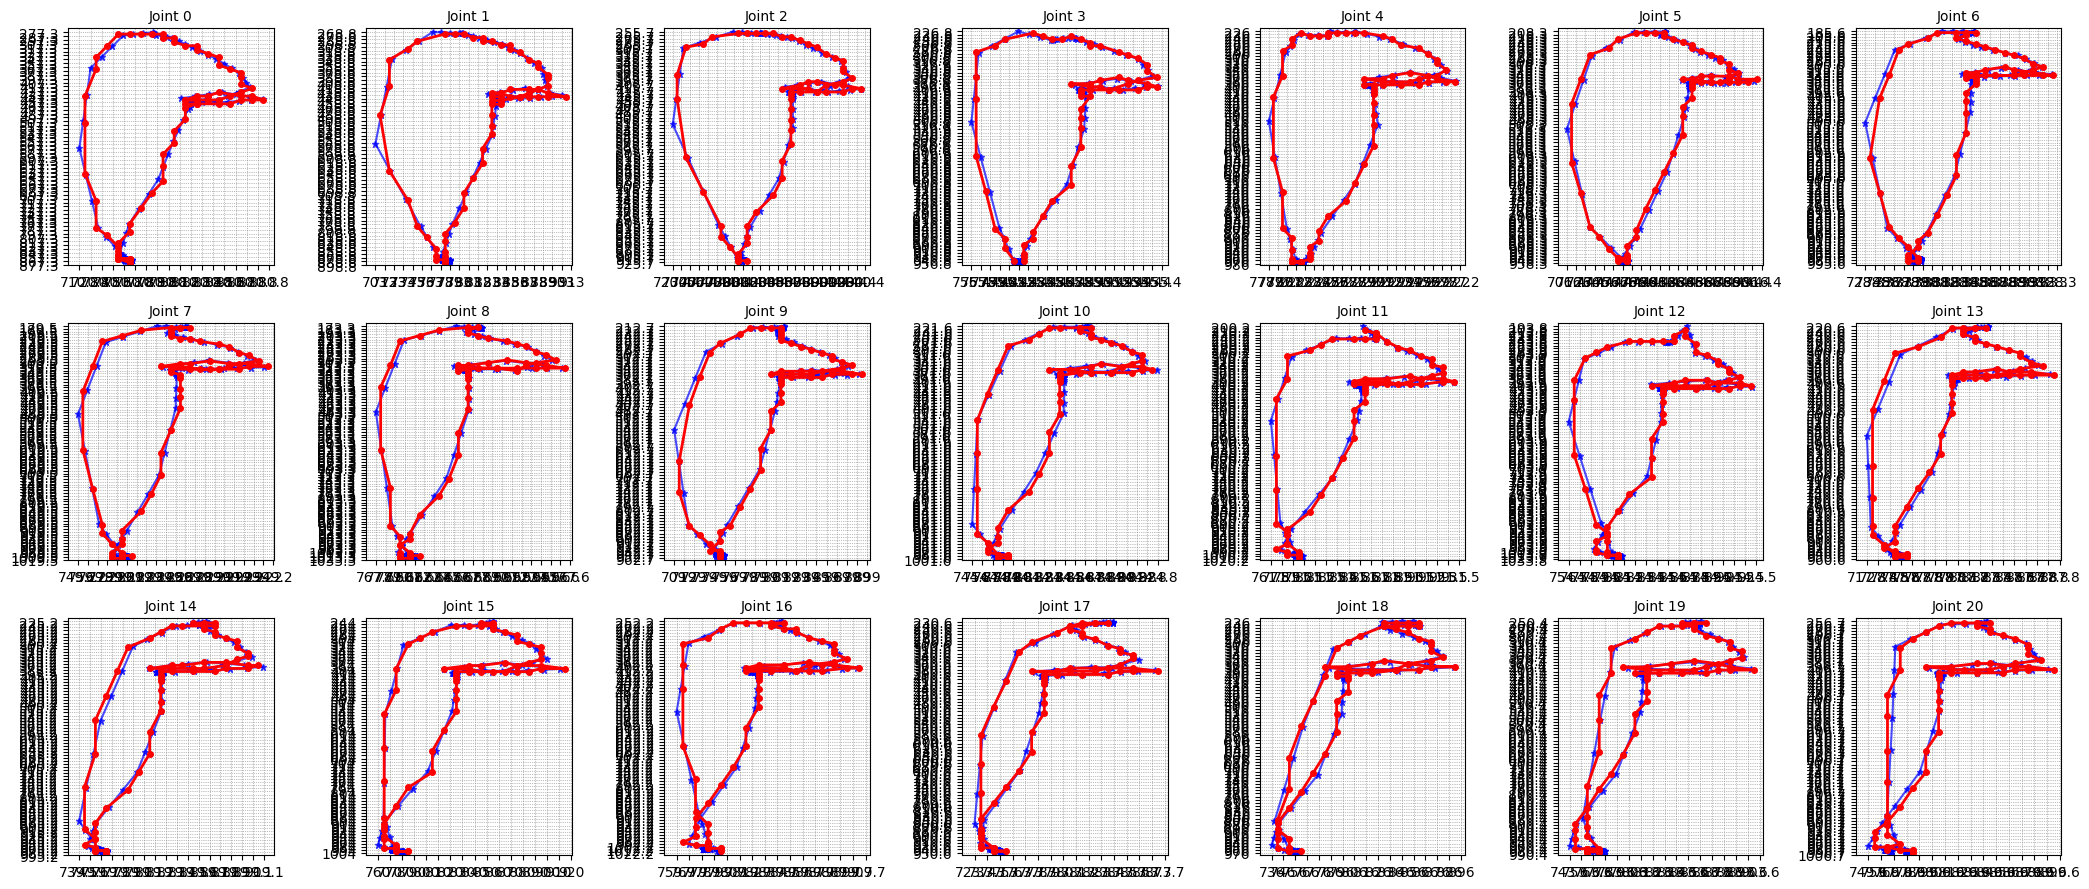

/tmp/ipykernel_1376026/226767238.py:96: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('nipy_spectral', num_joints)


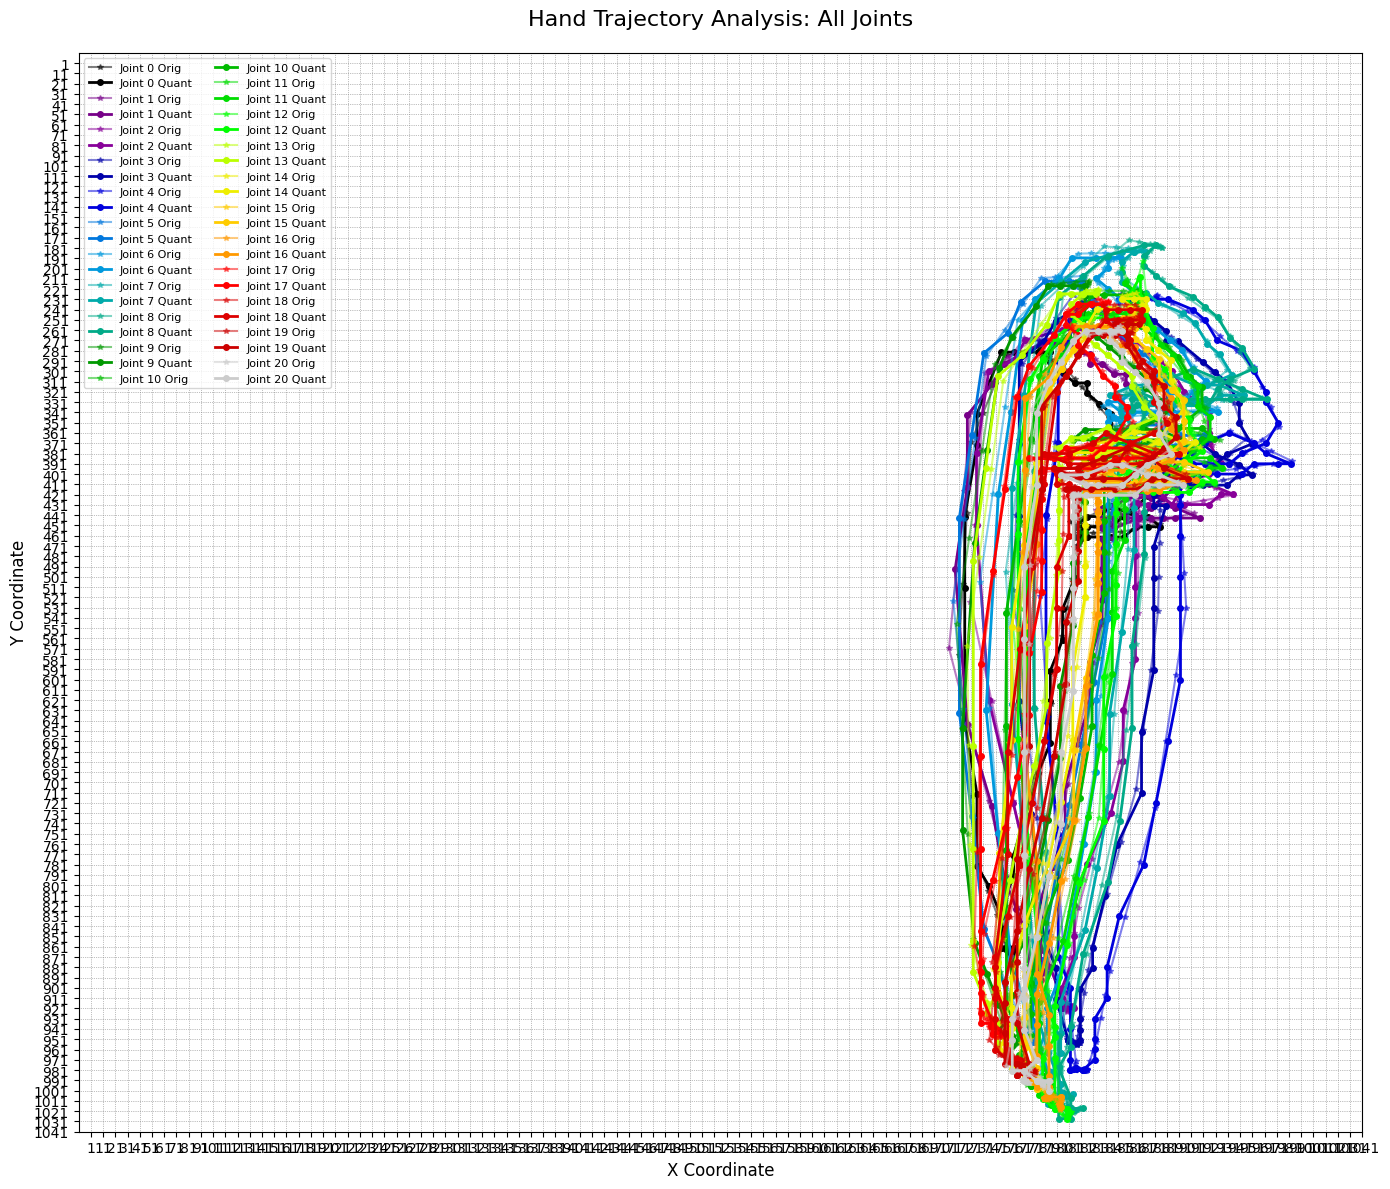

In [11]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# --- Load Data ---
with open("/nas/Chingiz/sing_language/all_json_to_pkl/01_real_word_keypoint/01/01/NIA_SL_WORD0001_REAL01_F.pkl", "rb") as file:
    data = pickle.load(file)

# We assume 'hand_right' has shape (num_frames, 21, features)
hand_right = data['hand_right']

# --- Grid parameters ---
grid_size = 10  # size of each grid cell

def quantize_points(joint_points, grid_size):
    """
    Given an array of (x, y) points (shape: (num_frames, 2)), compute grid lines
    based on the point bounds and return the quantized point centers along with
    the grid lines and bounds.
    """
    x_min, x_max = joint_points[:, 0].min(), joint_points[:, 0].max()
    y_min, y_max = joint_points[:, 1].min(), joint_points[:, 1].max()
    
    # Generate grid lines with some padding
    dis = grid_size  # same as grid_size for consistency
    x_grid_lines = np.arange(x_min - grid_size + dis, x_max + grid_size + dis, grid_size)
    y_grid_lines = np.arange(y_min - grid_size + dis, y_max + grid_size + dis, grid_size)
    
    quantized_x, quantized_y = [], []
    for x, y in joint_points:
        x_cell = np.searchsorted(x_grid_lines, x) - 1
        y_cell = np.searchsorted(y_grid_lines, y) - 1
        
        if 0 <= x_cell < len(x_grid_lines) and 0 <= y_cell < len(y_grid_lines):
            x_center = x_grid_lines[x_cell] + grid_size / 2
            y_center = y_grid_lines[y_cell] + grid_size / 2
            # Append only if this grid cell center differs from the previous one
            if not quantized_x or (x_center != quantized_x[-1] or y_center != quantized_y[-1]):
                quantized_x.append(x_center)
                quantized_y.append(y_center)
                
    return quantized_x, quantized_y, x_grid_lines, y_grid_lines, x_min, x_max, y_min, y_max

num_joints = 21

###############################################################################
# Figure 1: 21 Subplots (One per Joint) in a Single Image
###############################################################################
# We'll arrange the subplots in a grid. Adjust the rows and columns as needed.
rows, cols = 3, 7  # 3 rows x 7 columns gives us 21 subplots
fig_subplots, axes = plt.subplots(rows, cols, figsize=(21, 9))
axes = axes.flatten()  # Convert the 2D array to 1D for easy iteration

for joint_index in range(num_joints):
    ax = axes[joint_index]
    joint_points = hand_right[:, joint_index, :2]  # shape: (num_frames, 2)
    qx, qy, x_grid_lines, y_grid_lines, x_min, x_max, y_min, y_max = quantize_points(joint_points, grid_size)
    
    # Plot the original trajectory
    ax.plot(joint_points[:, 0], joint_points[:, 1], 'b-*', label='Original', 
            alpha=0.7, markersize=5)
    # Plot the quantized trajectory
    ax.plot(qx, qy, 'r-o', linewidth=2, markersize=4, label='Quantized')
    
    # Set the grid and axis limits for this subplot
    ax.set_xticks(x_grid_lines)
    ax.set_yticks(y_grid_lines)
    ax.grid(linestyle=':', linewidth=0.5, color='gray')
    ax.set_xlim(x_min - grid_size, x_max + grid_size)
    ax.set_ylim(y_min - grid_size, y_max + grid_size)
    ax.invert_yaxis()  # Invert y-axis if necessary for your coordinate system
    
    ax.set_title(f'Joint {joint_index}', fontsize=10)
    # Optionally enable the legend (it might be crowded for small subplots)
    # ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

###############################################################################
# Figure 2: Combined Plot of All 21 Joints on One Axes with a Global Grid
###############################################################################
# Compute global bounds from all joints for consistent scaling
all_points = hand_right.reshape(-1, 2)
global_x_min, global_x_max = all_points[:, 0].min(), all_points[:, 0].max()
global_y_min, global_y_max = all_points[:, 1].min(), all_points[:, 1].max()

# Compute global grid lines based on the overall bounds
dis = grid_size
global_x_grid_lines = np.arange(global_x_min - grid_size + dis, 
                                global_x_max + grid_size + dis, grid_size)
global_y_grid_lines = np.arange(global_y_min - grid_size + dis, 
                                global_y_max + grid_size + dis, grid_size)

fig_all, ax_all = plt.subplots(figsize=(14, 12))
colors = plt.cm.get_cmap('nipy_spectral', num_joints)

for joint_index in range(num_joints):
    joint_points = hand_right[:, joint_index, :2]
    qx, qy, _, _, _, _, _, _ = quantize_points(joint_points, grid_size)
    
    color = colors(joint_index)
    # Plot original trajectory for the joint
    ax_all.plot(joint_points[:, 0], joint_points[:, 1], '-*', color=color,
                alpha=0.5, markersize=4, label=f'Joint {joint_index} Orig')
    # Plot quantized trajectory for the joint
    ax_all.plot(qx, qy, '-o', color=color, linewidth=2, markersize=4,
                label=f'Joint {joint_index} Quant')

# Set the global axis limits
ax_all.set_xlim(global_x_min - grid_size, global_x_max + grid_size)
ax_all.set_ylim(global_y_min - grid_size, global_y_max + grid_size)
ax_all.invert_yaxis()
ax_all.set_xlabel('X Coordinate', fontsize=12)
ax_all.set_ylabel('Y Coordinate', fontsize=12)
ax_all.set_title('Hand Trajectory Analysis: All Joints', fontsize=16, pad=20)

# Apply the global grid
ax_all.set_xticks(global_x_grid_lines)
ax_all.set_yticks(global_y_grid_lines)
ax_all.grid(linestyle=':', linewidth=0.5, color='gray')

# Because the legend may become crowded, you can choose to show it or not.
# The following line shows the legend. If it overlaps the plot, you can comment it out.
ax_all.legend(loc='upper left', fontsize=8, ncol=2)
plt.tight_layout()
plt.show()


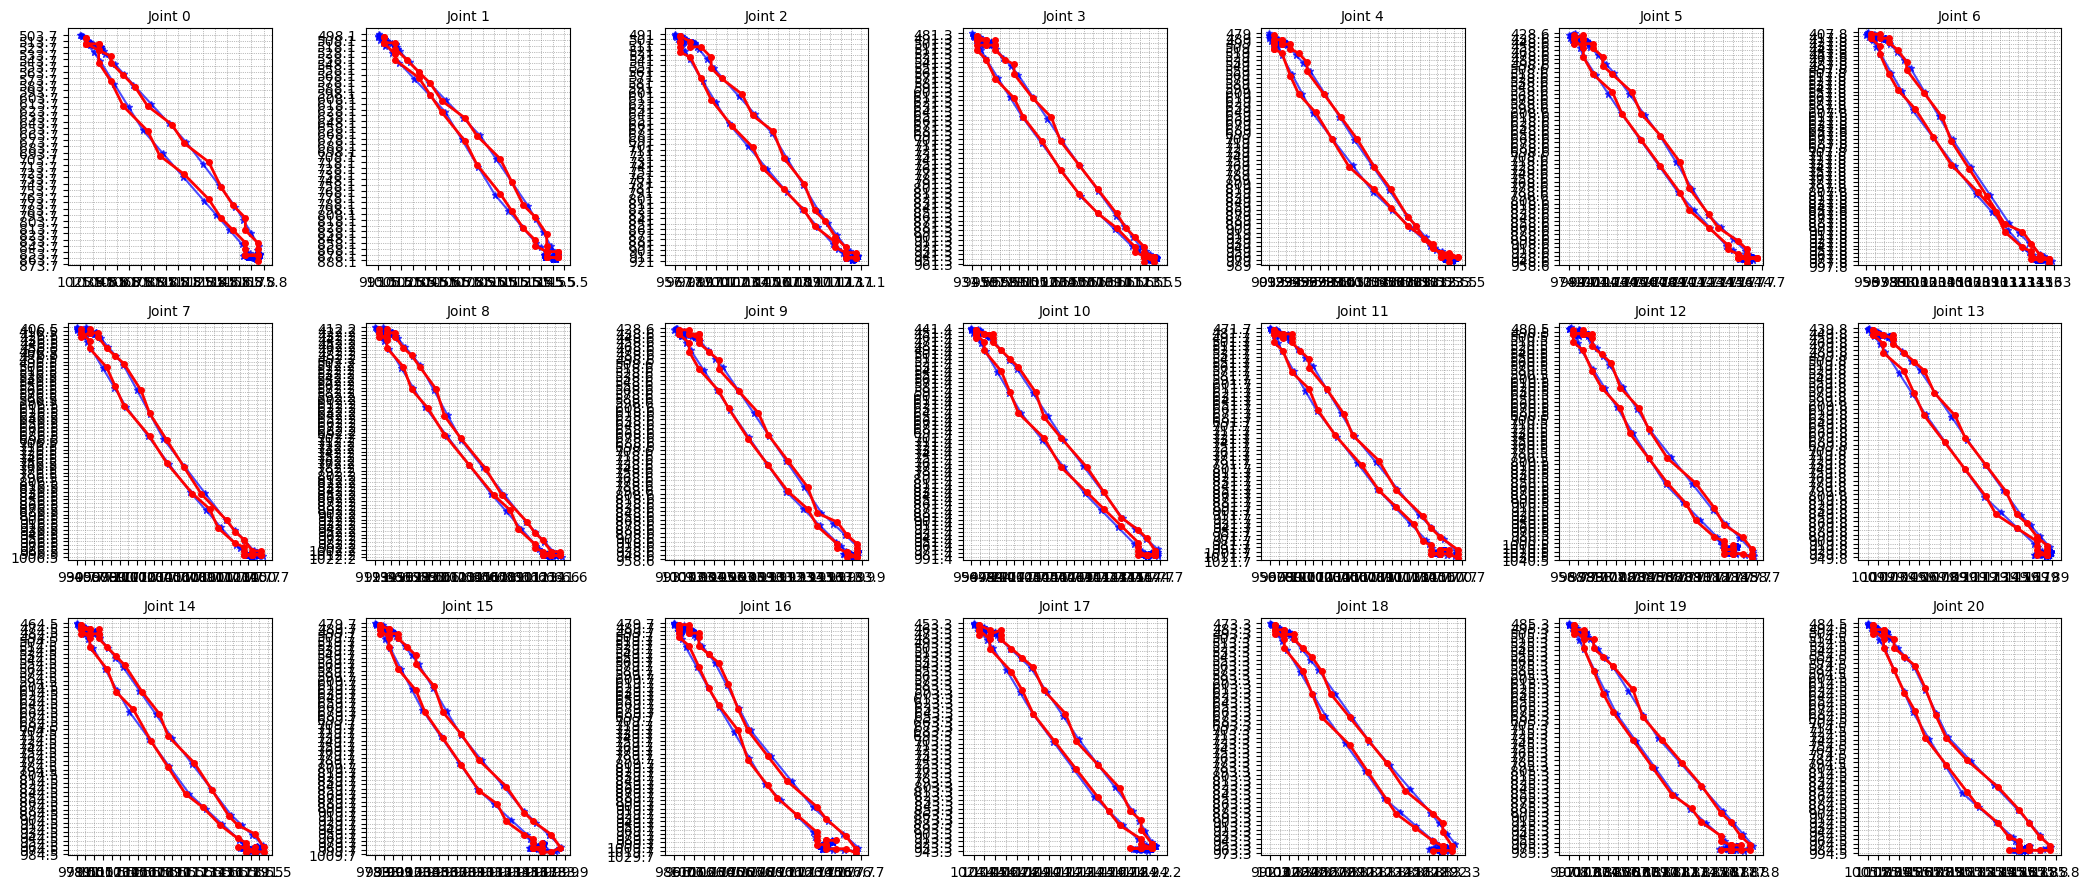

/tmp/ipykernel_1376026/3299793195.py:96: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('nipy_spectral', num_joints)


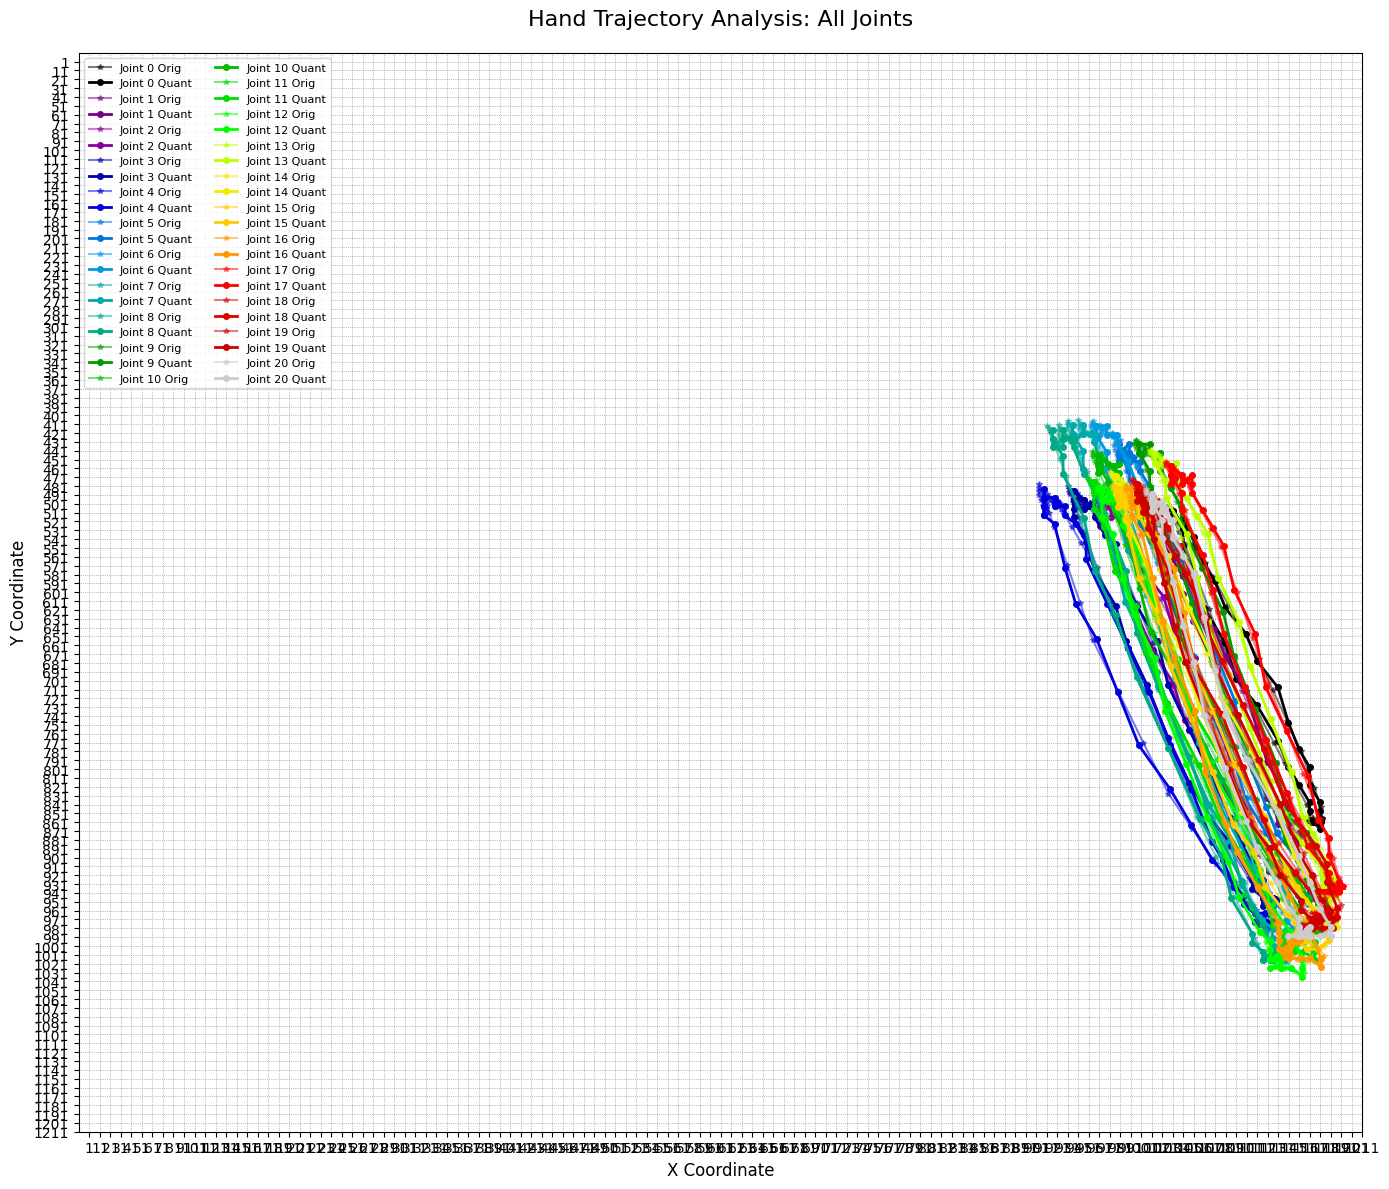

In [13]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# --- Load Data ---
with open("/nas/Chingiz/sing_language/all_json_to_pkl/01_real_word_keypoint/01/01/NIA_SL_WORD0001_REAL01_F.pkl", "rb") as file:
    data = pickle.load(file)

# We assume 'hand_right' has shape (num_frames, 21, features)
hand_right = data['hand_left']

# --- Grid parameters ---
grid_size = 10  # size of each grid cell

def quantize_points(joint_points, grid_size):
    """
    Given an array of (x, y) points (shape: (num_frames, 2)), compute grid lines
    based on the point bounds and return the quantized point centers along with
    the grid lines and bounds.
    """
    x_min, x_max = joint_points[:, 0].min(), joint_points[:, 0].max()
    y_min, y_max = joint_points[:, 1].min(), joint_points[:, 1].max()
    
    # Generate grid lines with some padding
    dis = grid_size  # same as grid_size for consistency
    x_grid_lines = np.arange(x_min - grid_size + dis, x_max + grid_size + dis, grid_size)
    y_grid_lines = np.arange(y_min - grid_size + dis, y_max + grid_size + dis, grid_size)
    
    quantized_x, quantized_y = [], []
    for x, y in joint_points:
        x_cell = np.searchsorted(x_grid_lines, x) - 1
        y_cell = np.searchsorted(y_grid_lines, y) - 1
        
        if 0 <= x_cell < len(x_grid_lines) and 0 <= y_cell < len(y_grid_lines):
            x_center = x_grid_lines[x_cell] + grid_size / 2
            y_center = y_grid_lines[y_cell] + grid_size / 2
            # Append only if this grid cell center differs from the previous one
            if not quantized_x or (x_center != quantized_x[-1] or y_center != quantized_y[-1]):
                quantized_x.append(x_center)
                quantized_y.append(y_center)
                
    return quantized_x, quantized_y, x_grid_lines, y_grid_lines, x_min, x_max, y_min, y_max

num_joints = 21

###############################################################################
# Figure 1: 21 Subplots (One per Joint) in a Single Image
###############################################################################
# We'll arrange the subplots in a grid. Adjust the rows and columns as needed.
rows, cols = 3, 7  # 3 rows x 7 columns gives us 21 subplots
fig_subplots, axes = plt.subplots(rows, cols, figsize=(21, 9))
axes = axes.flatten()  # Convert the 2D array to 1D for easy iteration

for joint_index in range(num_joints):
    ax = axes[joint_index]
    joint_points = hand_right[:, joint_index, :2]  # shape: (num_frames, 2)
    qx, qy, x_grid_lines, y_grid_lines, x_min, x_max, y_min, y_max = quantize_points(joint_points, grid_size)
    
    # Plot the original trajectory
    ax.plot(joint_points[:, 0], joint_points[:, 1], 'b-*', label='Original', 
            alpha=0.7, markersize=5)
    # Plot the quantized trajectory
    ax.plot(qx, qy, 'r-o', linewidth=2, markersize=4, label='Quantized')
    
    # Set the grid and axis limits for this subplot
    ax.set_xticks(x_grid_lines)
    ax.set_yticks(y_grid_lines)
    ax.grid(linestyle=':', linewidth=0.5, color='gray')
    ax.set_xlim(x_min - grid_size, x_max + grid_size)
    ax.set_ylim(y_min - grid_size, y_max + grid_size)
    ax.invert_yaxis()  # Invert y-axis if necessary for your coordinate system
    
    ax.set_title(f'Joint {joint_index}', fontsize=10)
    # Optionally enable the legend (it might be crowded for small subplots)
    # ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

###############################################################################
# Figure 2: Combined Plot of All 21 Joints on One Axes with a Global Grid
###############################################################################
# Compute global bounds from all joints for consistent scaling
all_points = hand_right.reshape(-1, 2)
global_x_min, global_x_max = all_points[:, 0].min(), all_points[:, 0].max()
global_y_min, global_y_max = all_points[:, 1].min(), all_points[:, 1].max()

# Compute global grid lines based on the overall bounds
dis = grid_size
global_x_grid_lines = np.arange(global_x_min - grid_size + dis, 
                                global_x_max + grid_size + dis, grid_size)
global_y_grid_lines = np.arange(global_y_min - grid_size + dis, 
                                global_y_max + grid_size + dis, grid_size)

fig_all, ax_all = plt.subplots(figsize=(14, 12))
colors = plt.cm.get_cmap('nipy_spectral', num_joints)

for joint_index in range(num_joints):
    joint_points = hand_right[:, joint_index, :2]
    qx, qy, _, _, _, _, _, _ = quantize_points(joint_points, grid_size)
    
    color = colors(joint_index)
    # Plot original trajectory for the joint
    ax_all.plot(joint_points[:, 0], joint_points[:, 1], '-*', color=color,
                alpha=0.5, markersize=4, label=f'Joint {joint_index} Orig')
    # Plot quantized trajectory for the joint
    ax_all.plot(qx, qy, '-o', color=color, linewidth=2, markersize=4,
                label=f'Joint {joint_index} Quant')

# Set the global axis limits
ax_all.set_xlim(global_x_min - grid_size, global_x_max + grid_size)
ax_all.set_ylim(global_y_min - grid_size, global_y_max + grid_size)
ax_all.invert_yaxis()
ax_all.set_xlabel('X Coordinate', fontsize=12)
ax_all.set_ylabel('Y Coordinate', fontsize=12)
ax_all.set_title('Hand Trajectory Analysis: All Joints', fontsize=16, pad=20)

# Apply the global grid
ax_all.set_xticks(global_x_grid_lines)
ax_all.set_yticks(global_y_grid_lines)
ax_all.grid(linestyle=':', linewidth=0.5, color='gray')

# Because the legend may become crowded, you can choose to show it or not.
# The following line shows the legend. If it overlaps the plot, you can comment it out.
ax_all.legend(loc='upper left', fontsize=8, ncol=2)
plt.tight_layout()
plt.show()
